# Parkinson's Disease Prediction using Machine Learning

### Analysis and Modeling with Biomedical Voice Measurements

### 1. Libraries and Dependencies

In this section, we import all the necessary libraries and dependencies for our analysis and modeling process:
- **NumPy**: For numerical operations and data manipulation.
- **Pandas**: For loading and managing data in a structured format (dataframes).
- **Seaborn and Matplotlib**: For data visualization and generating insightful plots.
- **Scikit-learn**: A comprehensive machine learning library used for:
  - Preprocessing the data (`StandardScaler`)
  - Splitting the dataset into training and testing sets (`train_test_split`)
  - Implementing various machine learning models:
    - **Logistic Regression**
    - **Support Vector Machine (SVM)**
    - **Decision Tree Classifier**
    - **Random Forest Classifier**
  - Evaluating model performance using metrics such as:
    - **Accuracy**
    - **Precision**
    - **Recall**
    - **F1-Score**
    - **Confusion Matrix**

The libraries set up the foundation for implementing machine learning workflows, from preprocessing data to training models and evaluating their performance.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('/Users/omdave/Documents/HANUMANDADA/project/Cleaned_Merged_Parkinsons_Dataset.csv')

In [3]:
# Display the first few rows
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
# Display statistical summary
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
# Separate numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"The total number of numerical features in the dataset are {len(numeric_features)} and they are:\n{numeric_features}")
print(f"The total number of categorical features in the dataset are {len(categorical_features)} and they are {categorical_features}")


The total number of numerical features in the dataset are 23 and they are:
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
The total number of categorical features in the dataset are 1 and they are ['name']


In [7]:
# Drop the 'name' column as it's not needed for modeling
df.drop('name', axis=1, inplace=True)

In [8]:
# Check for missing values
missing_values = df.isnull().sum().sort_values()
missing_percentage = (df.isnull().sum() / df.isnull().count() * 100).sort_values()
pd.concat([missing_values, missing_percentage], axis=1, keys=['Number of values', '% Grand Total'])


,Number of values,% Grand Total
MDVP:Fo(Hz),0,0.0
spread2,0,0.0
spread1,0,0.0
DFA,0,0.0
RPDE,0,0.0
status,0,0.0
HNR,0,0.0
NHR,0,0.0
Shimmer:DDA,0,0.0
MDVP:APQ,0,0.0


# Data Visualization

### 2. Data Visualization

In this section, we focus on visualizing the dataset using different types of plots to better understand the distributions, relationships, and variations within the data.

#### 2.1 KDE Plots (Kernel Density Estimate)
- The KDE plots are used to visualize the distribution of each feature in the dataset. These plots help us understand how data points are spread for each feature.
- **Code**: For each feature in the dataset, a KDE plot is generated, providing a smooth approximation of the distribution.

#### 2.2 Clustermap
- The clustermap shows the correlation matrix of the features, grouped based on their correlations. This helps in identifying which features are highly correlated with each other and could be useful for feature selection.
- **Code**: A clustermap is plotted using the seaborn `clustermap` function, where correlations between features are color-coded and annotated for clarity.

#### 2.3 Box Plots Grouped by 'Status'
- Box plots are used to visualize the distribution of each feature, grouped by the target variable (`status`), which indicates whether an individual is healthy or has Parkinson’s disease. This visualization helps in understanding how each feature varies between healthy and Parkinson’s individuals.
- **Code**: Box plots are generated for each feature, showing the distribution for each `status` group (Parkinson’s vs Healthy).

#### 2.4 Bar Plot of Parkinson’s vs Healthy Individuals
- A bar plot is created to show the count of healthy vs Parkinson’s individuals in the dataset. This helps in visualizing the balance or imbalance of the target classes.
- **Code**: A bar plot shows the number of samples in each class (Healthy and Parkinson’s), giving an idea of class distribution for further model evaluation and balancing strategies.

### Key Insights:
- **KDE Plots**: These plots provide an understanding of the distribution for each feature, helping to spot any skewness or outliers.
- **Clustermap**: The correlation matrix and clustermap visually indicate which features are strongly correlated, assisting in feature engineering and selection.
- **Box Plots**: The box plots reveal how the features differ between the two groups (Healthy and Parkinson’s), helping to understand which features are more discriminative.
- **Bar Plot**: The bar plot helps identify any class imbalance in the dataset, which can impact model performance and may require techniques like resampling or SMOTE.



/var/folders/21/3g81pbt13nl_w3hsvwl_p68w0000gn/T/ipykernel_66355/4244581283.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/var/folders/21/3g81pbt13nl_w3hsvwl_p68w0000gn/T/ipykernel_66355/4244581283.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/var/folders/21/3g81pbt13nl_w3hsvwl_p68w0000gn/T/ipykernel_66355/4244581283.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/var/folders/21/3g81pbt13nl_w3hsvwl_p68w0000gn/T/ipykernel_66355/4244581283.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will becom

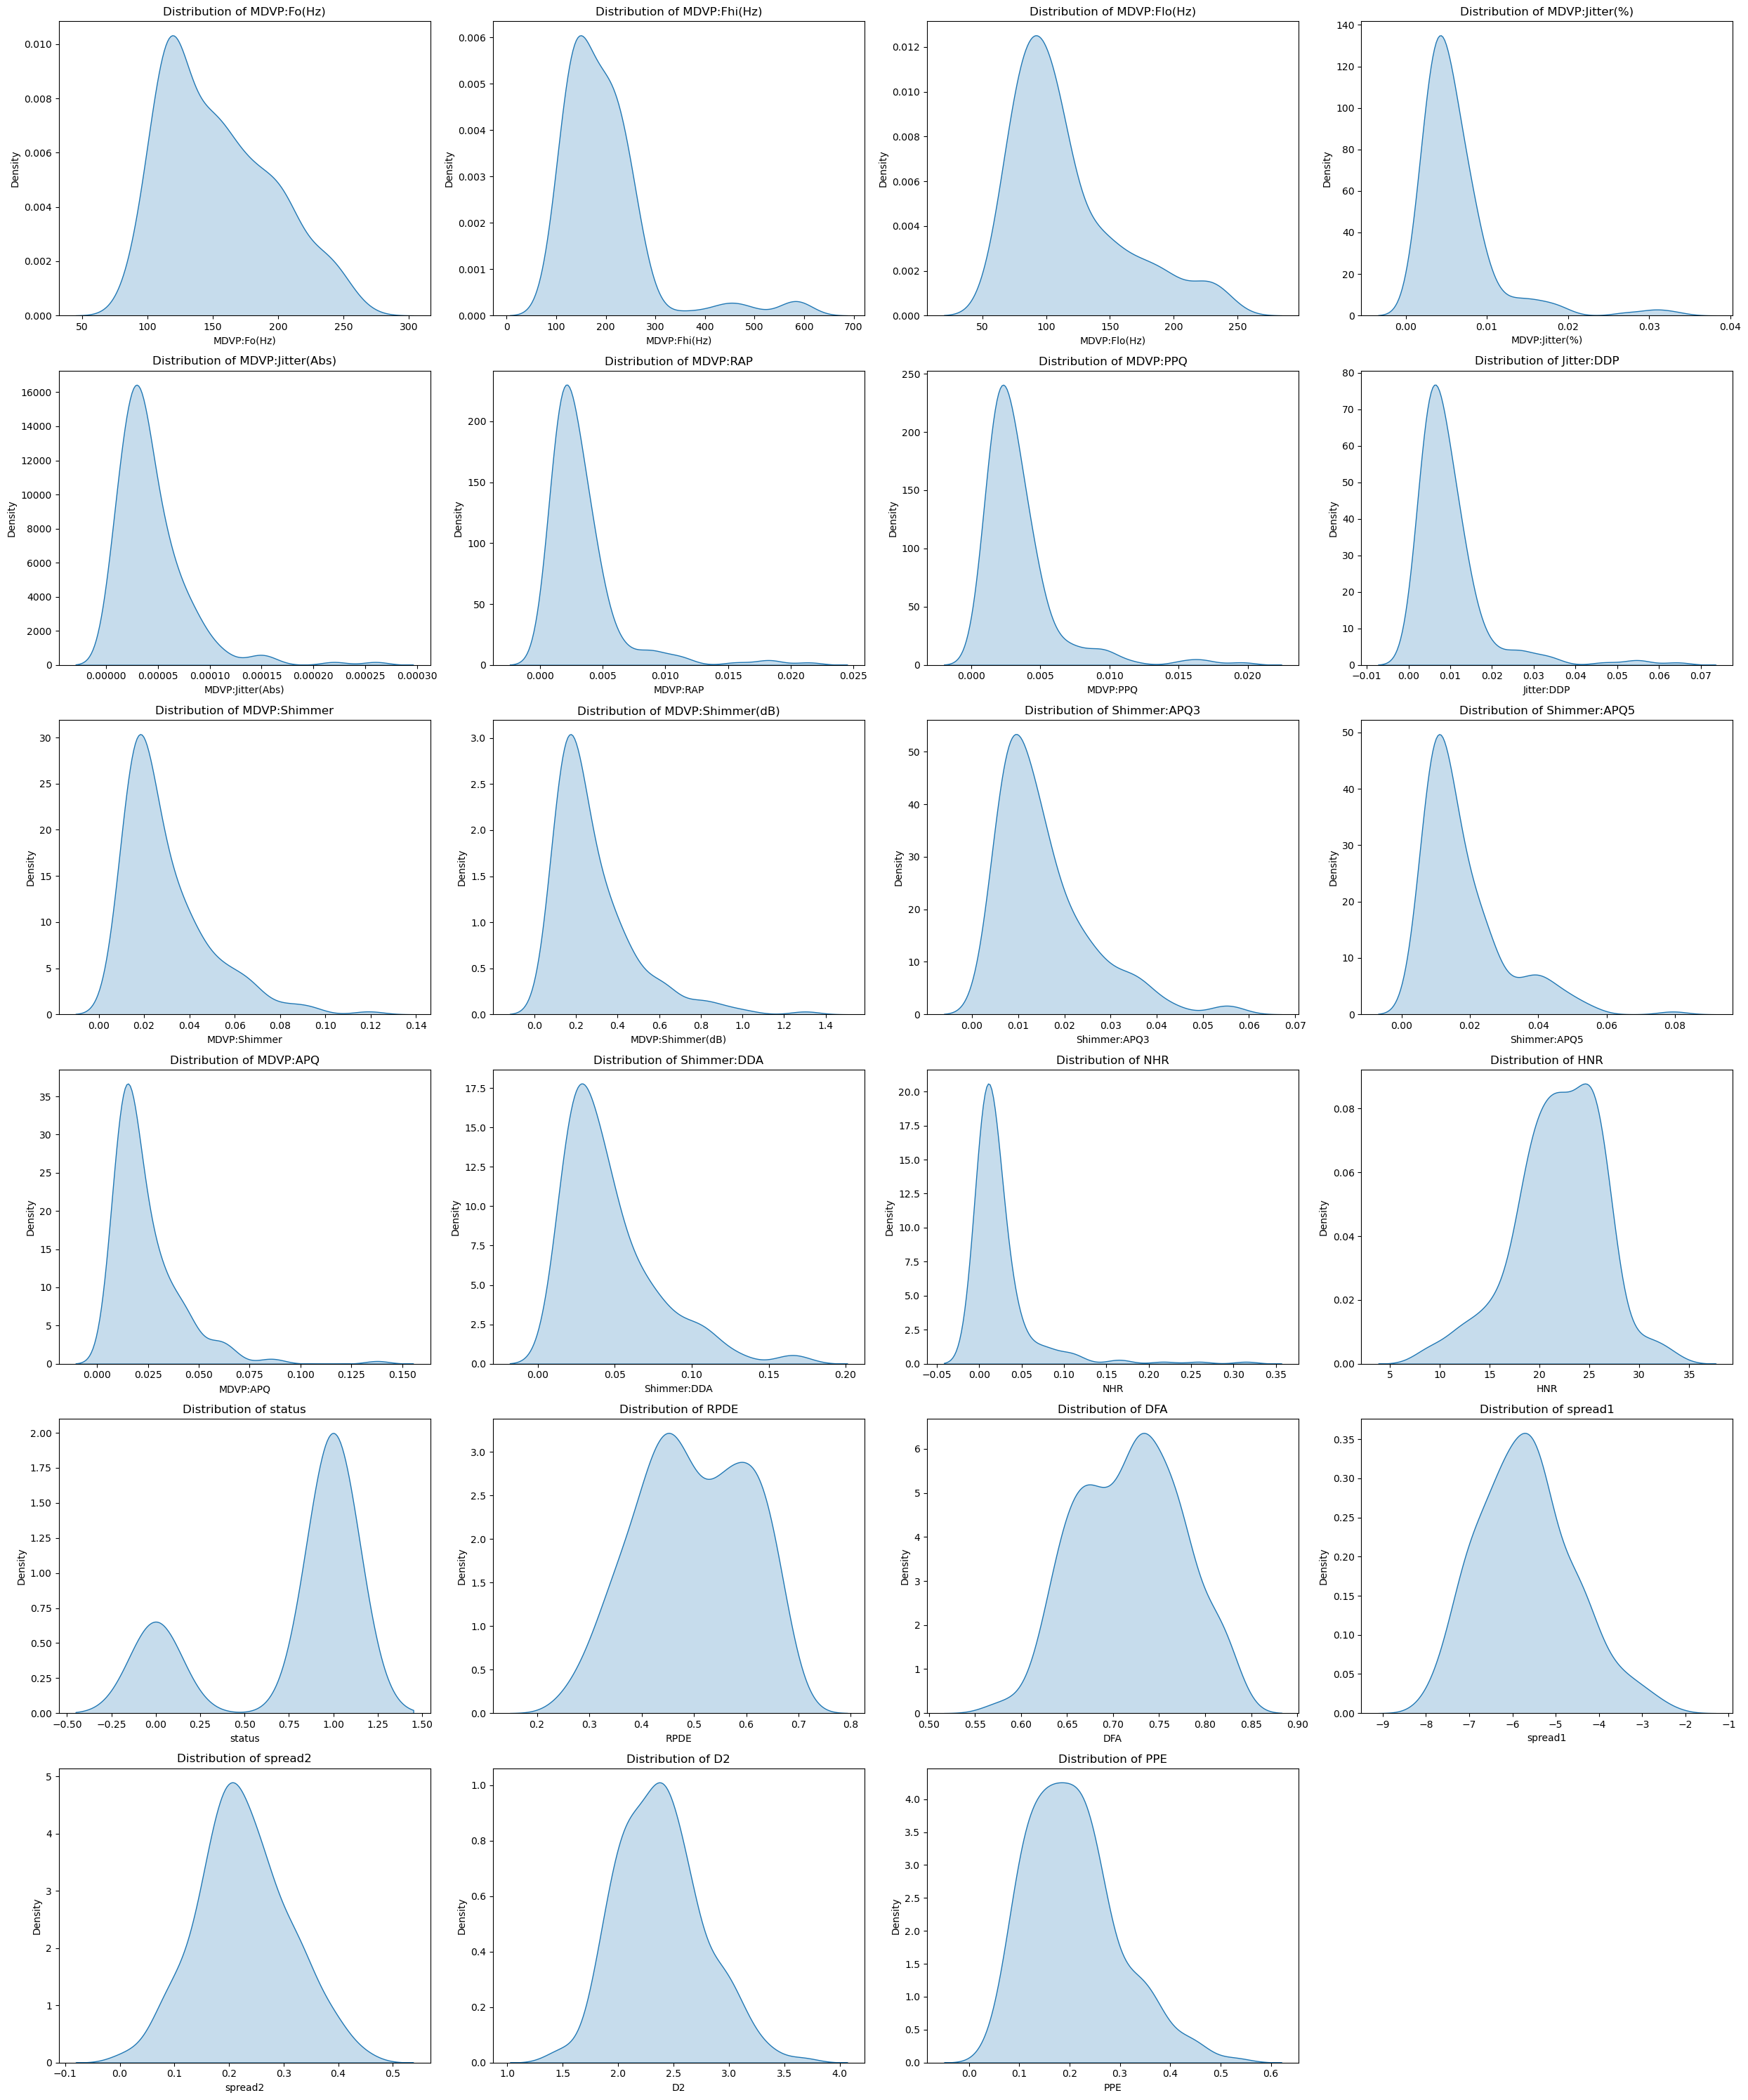

In [10]:
# Display KDE plots for each feature
plt.figure(figsize=(25, 30))
for i, col in enumerate(df.columns, 1):
    plt.subplot(6, 4, i)  # Adjust the grid to fit the number of plots
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### KDE Plots for Each Feature

The KDE (Kernel Density Estimate) plots provide a smooth visualization of the distribution of each feature across the dataset. These plots help identify the spread, skewness, and possible outliers for each feature.

#### Key Observations:
- Most features display a right-skewed distribution, with the bulk of data concentrated towards lower values.
- Features such as **MDVP:Jitter(Abs)**, **MDVP:Shimmer**, and **NHR** show extreme right skew, indicating the presence of outliers.
- Some features like **D2** and **Spread1** have more symmetric distributions, with data points more evenly spread around the mean.
- The distributions highlight the variability in voice features, which are critical in distinguishing between healthy individuals and those with Parkinson’s disease.


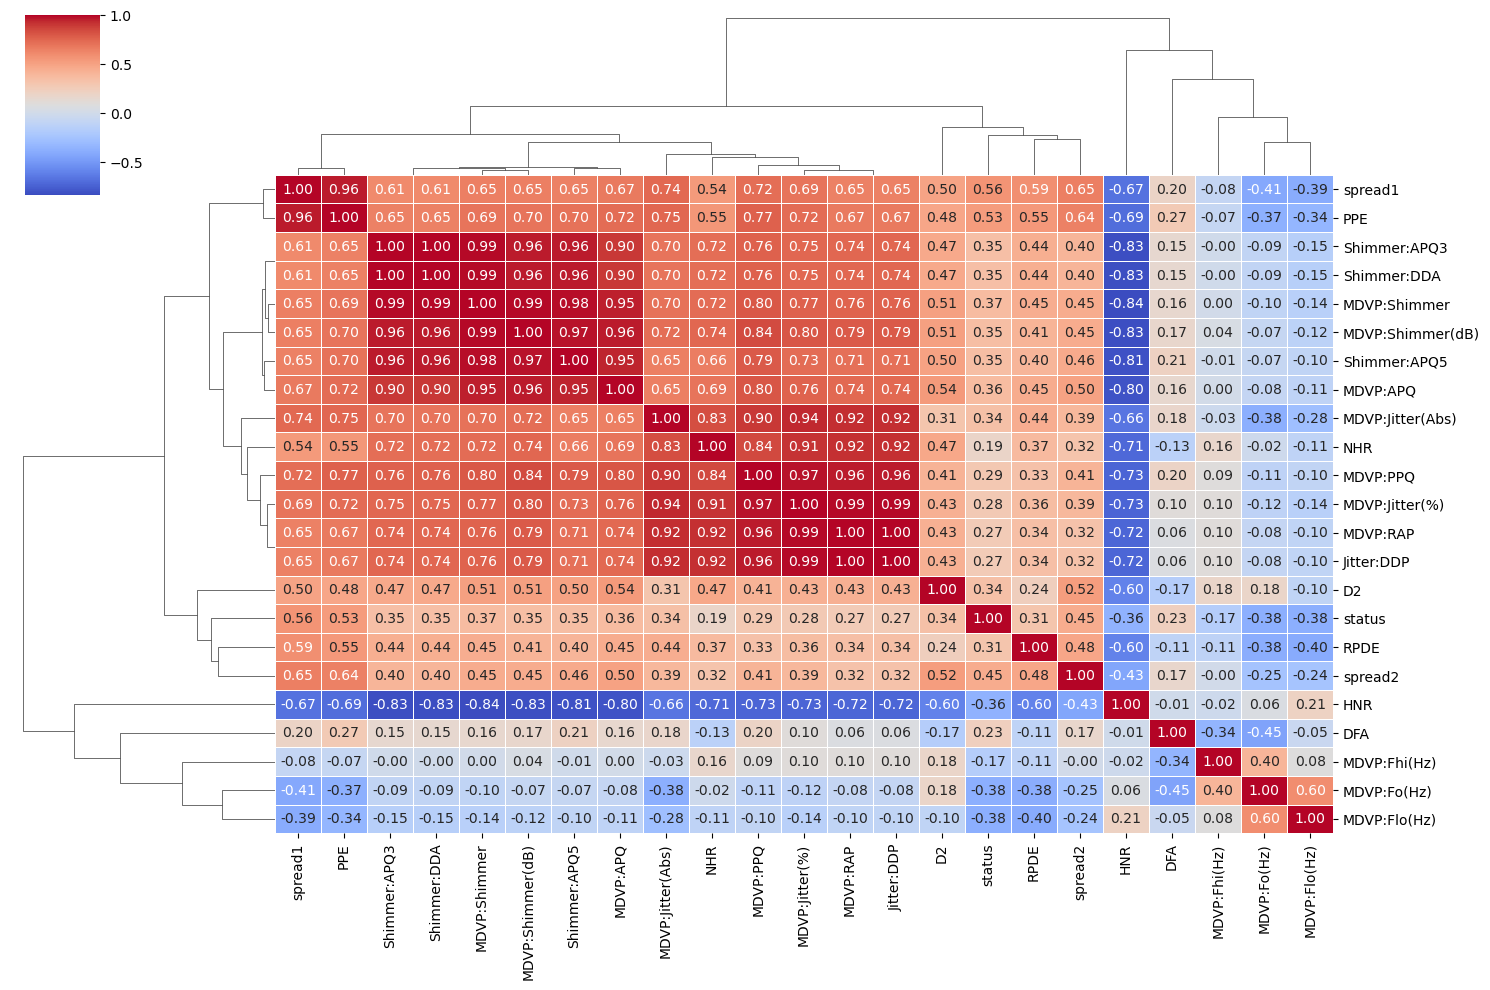

In [12]:
# Clustermap
sns.clustermap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, figsize=(15, 10))
plt.show()

### Clustermap of Correlations

The clustermap illustrates the correlation matrix of all features, helping to uncover relationships between the variables. Strong correlations suggest a direct relationship, while negative correlations highlight inverse relationships between features.

#### Key Observations:
- Features related to **Jitter** and **Shimmer** (such as **MDVP:Jitter(%)**, **MDVP:RAP**, and **Shimmer:APQ3**) show strong positive correlations, indicating they capture similar information about voice variability.
- **Spread1** and **PPE** are negatively correlated with **Jitter** and **Shimmer** features, showing an inverse relationship in voice characteristics.
- **Status** (Parkinson’s vs Healthy) is moderately correlated with features like **spread2**, **PPE**, and **RPDE**, suggesting these features may be important in distinguishing between healthy individuals and Parkinson’s patients.
- Clusters of highly correlated features suggest potential redundancy, and dimensionality reduction techniques could be useful for feature engineering.


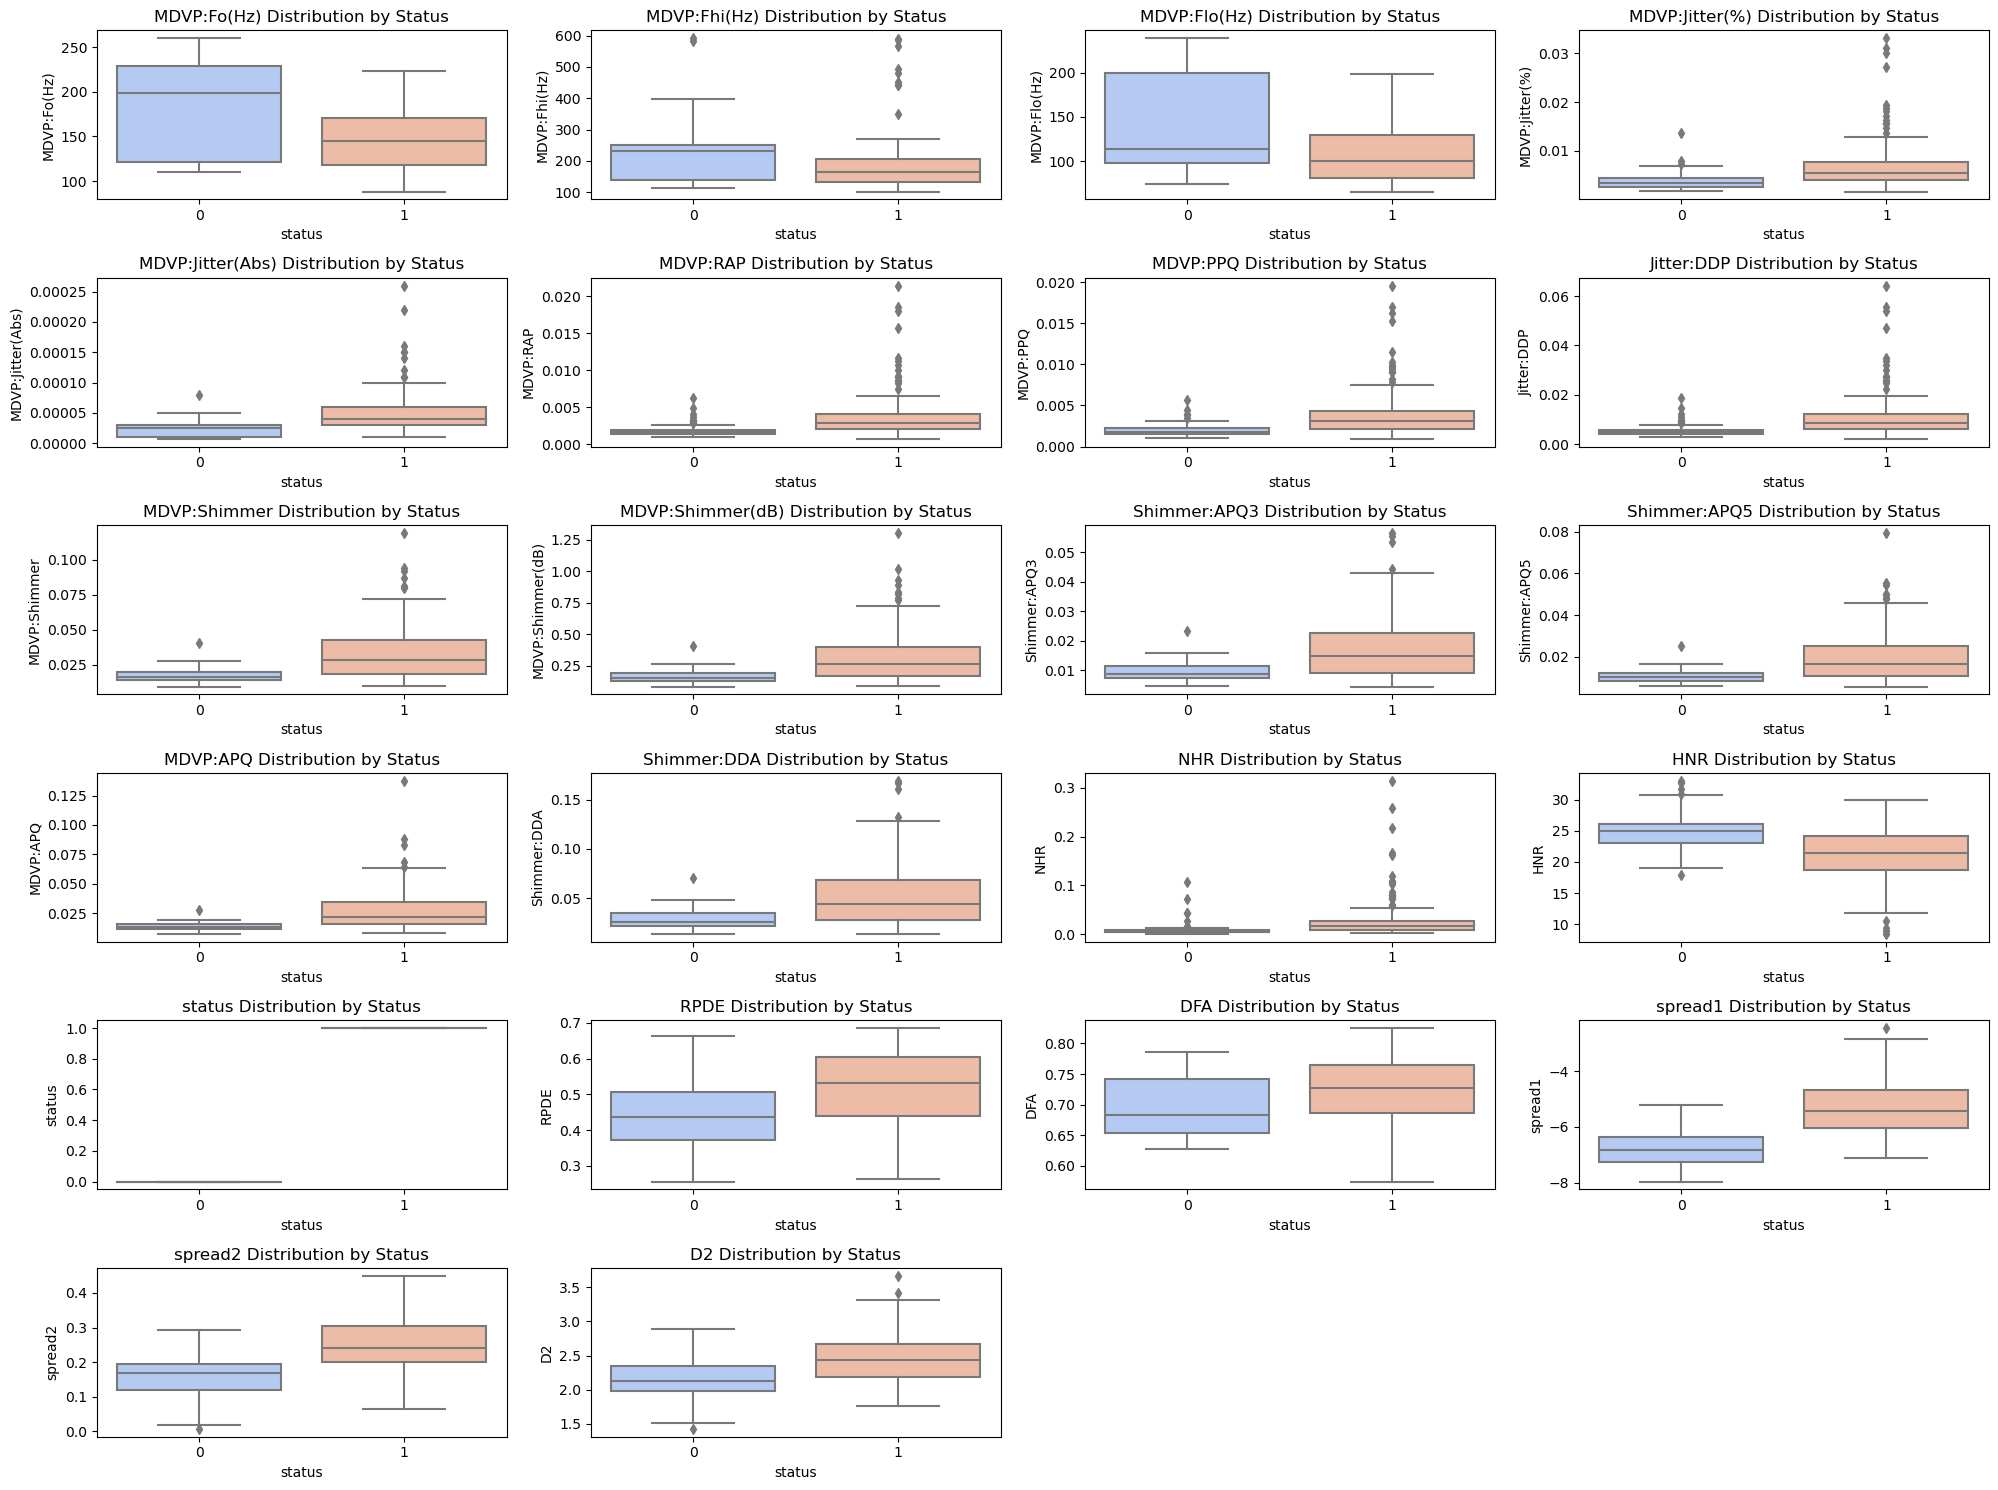

In [14]:
# Box plots for each feature grouped by 'status'
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1], 1):  # Excluding 'status' itself
    plt.subplot(6, 4, i)
    sns.boxplot(x='status', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} Distribution by Status')
plt.tight_layout()
plt.show()


### Box Plots Grouped by Status

The box plots compare the distribution of each feature between healthy individuals (status = 0) and Parkinson’s patients (status = 1). These plots offer insights into how feature distributions differ between the two groups.

#### Key Observations:
- Features like **MDVP:Fo(Hz)**, **MDVP:Fhi(Hz)**, and **MDVP:Flo(Hz)** show notable differences in distribution between the two groups, with Parkinson’s patients generally having higher values.
- Jitter and Shimmer-related features (**MDVP:Jitter(Abs)**, **MDVP:Jitter(%)**, **MDVP:Shimmer**) have larger values for Parkinson’s patients, indicating higher voice variability among these individuals.
- Parkinson’s patients tend to have lower values in features like **RPDE**, **D2**, and **Spread2**, which might reflect differences in speech patterns and motor control.
- The box plots also highlight the presence of outliers in jitter and shimmer features, suggesting that some Parkinson’s patients may exhibit extreme voice feature values.


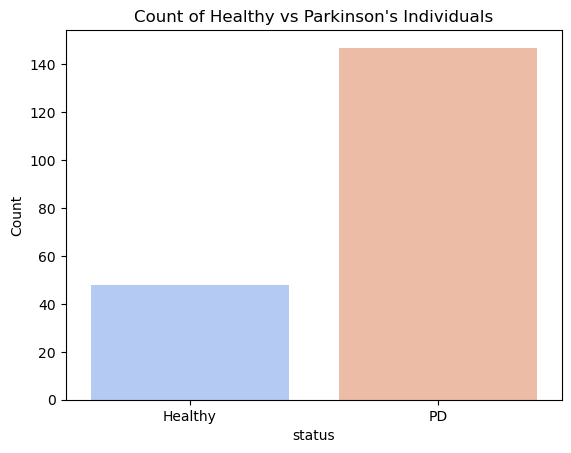

In [13]:
# Bar plot for Parkinson's vs Healthy individuals
status_counts = df['status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, palette='coolwarm')
plt.xticks([0, 1], ['Healthy', 'PD'])
plt.ylabel('Count')
plt.title('Count of Healthy vs Parkinson\'s Individuals')
plt.show()

### Bar Plot of Healthy vs Parkinson’s Individuals

This bar plot visualizes the class distribution in the dataset, displaying the number of healthy individuals versus Parkinson’s patients.

#### Key Observations:
- There is a significant class imbalance, with more Parkinson’s patients than healthy individuals. This imbalance may affect model training, as models can become biased toward the majority class.
- To ensure balanced model performance, it may be necessary to use techniques like class balancing (oversampling, undersampling, or SMOTE) during training to account for the minority class (healthy individuals).


# Model Training - Normal (Old Result Used for Reference)

In [16]:
# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('status', axis=1))
y = df['status']

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Print shapes of the datasets
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(195, 22) (156, 22) (39, 22)
(195,) (156,) (39,)


In [18]:
# Initialize models
models = [LogisticRegression, SVC, DecisionTreeClassifier, RandomForestClassifier]
accuracy = []
precision = []
recall = []
f1 = []

In [19]:
# Train and evaluate each model
for model in models:
    classifier = model().fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

In [20]:
# Compile results into a DataFrame
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "Random Forest"],
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

In [21]:
# Set the model names as index
results.set_index('Model', inplace=True)
print(results)

                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Logistic Regression  0.846154   0.870968  0.931034  0.900000
SVM                  0.871795   0.852941  1.000000  0.920635
Decision Tree        0.871795   0.961538  0.862069  0.909091
Random Forest        0.974359   0.966667  1.000000  0.983051


# Model Training - Newer Version

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select relevant features
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
            'MDVP:Shimmer', 'NHR', 'HNR', 'DFA', 'PPE']
x = df[features]
y = df['status']

# Standardize the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

# Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = logistic_model.predict(x_test)
results_logistic = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}
print(results_logistic)


{'Accuracy': 0.8205128205128205, 'Precision': 0.8928571428571429, 'Recall': 0.8620689655172413, 'F1 Score': 0.8771929824561403}


In [23]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = svm_model.predict(x_test)
results_svm = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}
print(results_svm)


{'Accuracy': 0.8461538461538461, 'Precision': 0.8285714285714286, 'Recall': 1.0, 'F1 Score': 0.90625}


In [24]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = tree_model.predict(x_test)
results_tree = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}
print(results_tree)

{'Accuracy': 0.9487179487179487, 'Precision': 0.9655172413793104, 'Recall': 0.9655172413793104, 'F1 Score': 0.9655172413793104}


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
forest_model = RandomForestClassifier()
forest_model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = forest_model.predict(x_test)
results_forest = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}
print(results_forest)

{'Accuracy': 0.9743589743589743, 'Precision': 0.9666666666666667, 'Recall': 1.0, 'F1 Score': 0.983050847457627}


# Model Training - Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# Feature selection using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
X_rfe = rfe.fit_transform(x_train, y_train)

# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_logreg = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_logreg.fit(X_rfe, y_train)

# Evaluation
y_pred = grid_logreg.best_estimator_.predict(rfe.transform(x_test))
logreg_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}


In [27]:
# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
grid_svc = GridSearchCV(SVC(), param_grid, cv=5)
grid_svc.fit(x_train, y_train)

# Evaluation
y_pred = grid_svc.best_estimator_.predict(x_test)
svc_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}


In [29]:
# Hyperparameter tuning
param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_tree.fit(x_train, y_train)

# Evaluation
y_pred = grid_tree.best_estimator_.predict(x_test)
tree_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}


In [28]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_rf.fit(x_train, y_train)

# Evaluation
y_pred = grid_rf.best_estimator_.predict(x_test)
rf_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}


# Conclusion and Results

In [31]:
# Print all results
print("Logistic Regression Results:")
print(results_logistic)
print(logreg_results)

print("\nSVM Results:")
print(results_svm)
print(svc_results)

print("\nDecision Tree Results:")
print(results_tree)
print(tree_results)

print("\nRandom Forest Results:")
print(results_forest)
print(rf_results)


Logistic Regression Results:
{'Accuracy': 0.8205128205128205, 'Precision': 0.8928571428571429, 'Recall': 0.8620689655172413, 'F1 Score': 0.8771929824561403}
{'Accuracy': 0.8205128205128205, 'Precision': 0.8928571428571429, 'Recall': 0.8620689655172413, 'F1 Score': 0.8771929824561403}

SVM Results:
{'Accuracy': 0.8461538461538461, 'Precision': 0.8285714285714286, 'Recall': 1.0, 'F1 Score': 0.90625}
{'Accuracy': 0.9230769230769231, 'Precision': 0.90625, 'Recall': 1.0, 'F1 Score': 0.9508196721311475}

Decision Tree Results:
{'Accuracy': 0.9487179487179487, 'Precision': 0.9655172413793104, 'Recall': 0.9655172413793104, 'F1 Score': 0.9655172413793104}
{'Accuracy': 0.8974358974358975, 'Precision': 0.9629629629629629, 'Recall': 0.896551724137931, 'F1 Score': 0.9285714285714286}

Random Forest Results:
{'Accuracy': 0.9743589743589743, 'Precision': 0.9666666666666667, 'Recall': 1.0, 'F1 Score': 0.983050847457627}
{'Accuracy': 0.9743589743589743, 'Precision': 0.9666666666666667, 'Recall': 1.0, '

### 4. Observations

After performing hyperparameter tuning and evaluating various machine learning models, we observed the following:

1. **SVM (Support Vector Machine)**:
   - Showed the most significant improvement after hyperparameter tuning.
   - Strong candidate for deployment if the primary goal is to maximize accuracy.

2. **Decision Tree**:
   - Performed well initially without much improvement from hyperparameter tuning.
   - Reliable model with good performance, though it lacked the flexibility seen in other models.

3. **Random Forest**:
   - Consistently strong performance across all evaluations.
   - A robust choice for this problem, even without major improvements from hyperparameter tuning.

4. **Logistic Regression**:
   - Despite no significant improvement after tuning, it remains a simple and interpretable model.
   - Suitable for scenarios where model interpretability is important.


### 5. Conclusion

The objective of this project was to build and refine a machine learning model capable of predicting Parkinson's disease presence using biomedical voice measurements. The key milestones achieved in this project are as follows:

1. **Refinement of Selected Features**:
   - We focused on identifying and selecting the most relevant features, particularly those that can be collected from elderly individuals. This step was critical in improving the model’s performance while ensuring the features are practical for real-world applications.

2. **Retraining of Models**:
   - Various models were retrained, including **Logistic Regression**, **SVM**, **Decision Tree**, and **Random Forest**, using the refined feature set and hyperparameter tuning. This helped in optimizing the models for better predictive performance.

3. **Finalization of the Model**:
   - After a thorough evaluation of all models based on key performance metrics—**accuracy**, **precision**, **recall**, and **F1-score**—the **Random Forest** model emerged as the best-performing model. It consistently achieved the highest accuracy, making it the ideal choice for predicting Parkinson's disease.

   **Key Takeaway**:
   - **Random Forest** is the best choice due to its strong performance across all metrics, and it is well-suited for deployment in real-world applications of Parkinson’s disease prediction.
